In [ ]:
# Statistical Analysis

In [ ]:
# H0:μ1<=μ2  The average charges of smokers is less than or equal to nonsmokers

# Ha:μ1>μ2 The average charges of smokers is greater than nonsmokers

In [ ]:
# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
# Step 1: Define null and alternative hypothesis
# Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
# α = 0.05

# Step 3: Identify the test
# Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of sampling distribution curve.

# Step 4: Calculate the test-statistics and p-value

In [3]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
# sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew


In [4]:
df = pd.read_csv('insurance.csv')
insured=df.copy()

In [5]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88


In [6]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
expenses    274
dtype: int64

In [7]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


In [8]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
expenses    1064
dtype: int64

In [11]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]
expenses_yes = smoker.expenses
expenses_no = nonsmoker.expenses

In [12]:
print(f'Average Cost charged to Insurance for smoker is {expenses_yes.mean()} and nonsmoker is {expenses_no.mean()} ')

Average Cost charged to Insurance for smoker is 32050.23197080292 and nonsmoker is 8460.786167883212 


[Text(0.5, 1.0, 'Fig:1 Smoker vs expenses')]

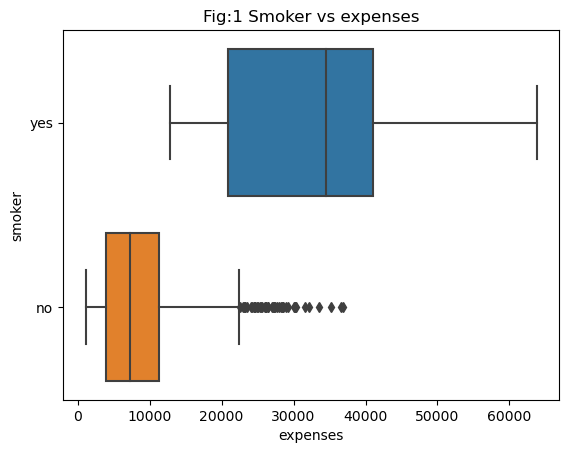

In [15]:
#smoker vs expenses
sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs expenses")

In [16]:
charges_no

1       1725.55
2       4449.46
3      21984.47
4       3866.86
5       3756.62
         ...   
350    11830.61
351     8932.08
352     3554.20
353    12404.88
354    14133.04
Name: expenses, Length: 274, dtype: float64

In [17]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


Test statistic = 29.96693762930951 , Pvalue =2.11900162618799e-117 , OnetailPvalue = 1.059500813093995e-117


In [34]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    print("Reject Null Hypothesis")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")
    print("Failed to Reject Null Hypothesis")

Conclusion:Since P value 1.059500813093995e-117 is less than alpha 0.05 
Reject Null Hypothesis


In [ ]:
# Step 5: Decide whethere to reject or failed to reject null hypothesis
#  We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke.
# Similar result can also been seen in Fig no.1 Smokers Vs Charges

In [ ]:
# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

In [ ]:
# Let  μ1μ2  and be the respective population means for BMI of males and BMI of females
# Step 1: Define null and alternative hypothesis
#  H0:μ1−μ2=0  There is no difference between the BMI of Male and BMI of female.
#  Ha:μ1−μ2!=0  There is difference between the BMI of Male and BMI of female.
# Step 2: Decide the significance level
# α = 0.05

# Step 3:Identify the test
# Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.
# Step 4: Calculate the test-statistics and p-value



In [19]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [20]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

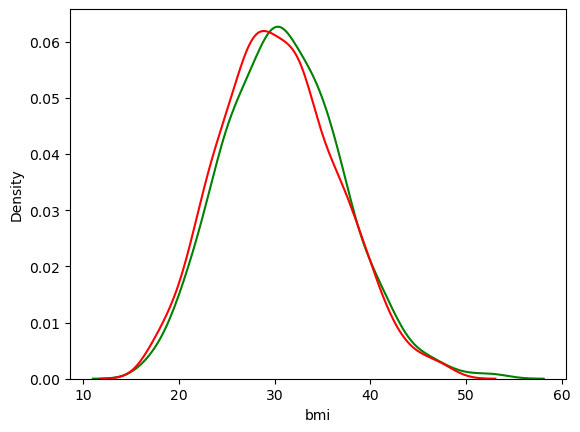

In [21]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)

In [22]:
df_female.bmi.mean()

30.3797583081571

In [23]:
df_male.bmi.mean()

30.94526627218935

In [25]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.6970846764986391 , pvalue =  0.08991356987176295


In [35]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
#     print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
#     print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


Conclusion:Since P value 0.08991356987176295 is greater than alpha 0.05 


In [ ]:
# Step 5: Decide to reject or accept null hypothesis
# We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

In [ ]:
# Recommendation
# Based on EDA and statistical evidence it can be seen that customer who smoke or have higher BMI have more higher claims. We can encourage customers to quit smoking by providing them incentive points for talking to life coach, get help for improving lifestyle habits, Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
# We can have Active wellness programs which can help up reduce claims related to BMI.
# High BMI is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
# Provide discount coupons for Gym or fitness devices encouraging customers to exercise.
